In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn as sk
import matplotlib.pyplot as plt
infile = 'merged_counties_2_year_merged.csv'

In [2]:
data = pd.read_csv(infile)
data.columns

Index(['Unnamed: 0', 'county', 'state', 'county_and_state_x', 'code', 'Deaths',
       'Population', 'Crude Rate', 'fips', 'smoking', 'obesity', 'foodenv',
       'exercise', 'noinsurance', 'physicians', 'pollution', 'diabetes',
       'county_and_state_y', 'code2', 'sunlight', 'blow', 'ganj', 'smack',
       'Age Adjusted Rate'],
      dtype='object')

In [3]:
xdata = data[['fips','smoking','obesity','foodenv','exercise','noinsurance','physicians','pollution','diabetes','sunlight']]
xdata.columns

Index(['fips', 'smoking', 'obesity', 'foodenv', 'exercise', 'noinsurance',
       'physicians', 'pollution', 'diabetes', 'sunlight'],
      dtype='object')

In [4]:
xdata = xdata.set_index('fips')

In [5]:
xdata.head()

,smoking,obesity,foodenv,exercise,noinsurance,physicians,pollution,diabetes,sunlight
fips,,,,,,,,,
1001.0,19.0,38.0,7.2,69.0,9.0,42.0,11.7,14.0,17103.72
1003.0,17.0,31.0,8.0,72.0,11.0,73.0,10.3,11.0,17660.59
1005.0,22.0,44.0,5.6,54.0,13.0,39.0,11.5,18.0,17315.13
1007.0,20.0,38.0,7.6,16.0,10.0,57.0,11.2,15.0,16904.87
1009.0,20.0,34.0,8.5,23.0,12.0,23.0,11.7,14.0,16393.63


In [6]:
xdata.count()

smoking        3147
obesity        3147
foodenv        3128
exercise       3141
noinsurance    3146
physicians     3011
pollution      3113
diabetes       3147
sunlight       3112
dtype: int64

In [7]:
xdata.describe()

,smoking,obesity,foodenv,exercise,noinsurance,physicians,pollution,diabetes,sunlight
count,3147.000000,3147.000000,3128.000000,3141.000000,3146.000000,3011.000000,3113.000000,3147.000000,3112.000000
mean,17.863997,32.121068,7.467455,62.926138,11.147807,54.604450,9.021234,11.677471,16038.079650
std,3.668208,4.597564,1.165923,23.101596,4.943698,35.330052,1.966374,2.620742,1499.246354
min,7.000000,14.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000,12945.790000
25%,15.000000,29.000000,6.900000,49.000000,7.000000,32.000000,7.700000,10.000000,14808.935000
50%,17.000000,32.000000,7.700000,66.000000,10.000000,49.000000,9.400000,12.000000,15843.840000
75%,20.000000,35.000000,8.200000,80.000000,14.000000,71.000000,10.400000,13.000000,17173.302500
max,43.000000,50.000000,10.000000,100.000000,33.000000,477.000000,19.700000,21.000000,20774.770000


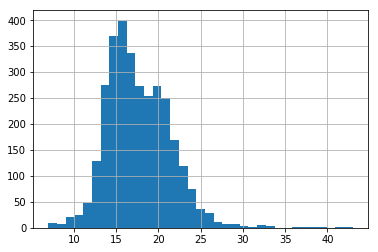

In [8]:
xdata.smoking.hist(bins=35)

In [9]:
xdata.smoking.kurtosis()

2.4576594544282275

In [10]:
xdata.smoking.skew()

0.8053556397878564

C:\Users\andre\Anaconda3\envs\plotenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


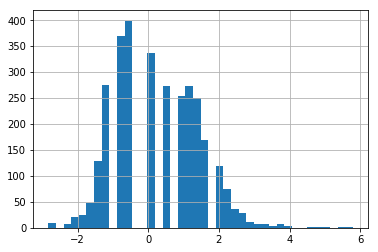

In [11]:
smoking_tr = np.sign(xdata.smoking - 17)*np.power(np.abs(xdata.smoking - 17) / 2.5, 0.75)
smoking_tr_df = pd.DataFrame(smoking_tr)
smoking_tr_df.smoking.hist(bins=40)

In [12]:
smoking_tr_df.smoking.kurtosis()

-0.3464118533217557

In [13]:
smoking_tr_df.smoking.skew()

0.2780787389599752

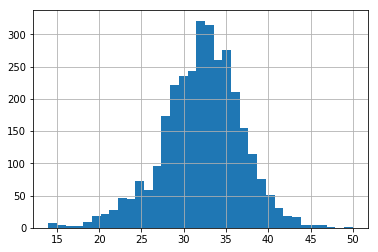

In [14]:
xdata.obesity.hist(bins=35)

In [15]:
xdata.obesity.kurtosis()

0.8504216318610034

In [16]:
xdata.obesity.skew()

-0.39386580840178353

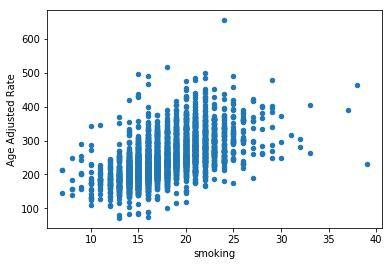

In [17]:
data.plot(x='smoking',y='Age Adjusted Rate',kind='scatter')

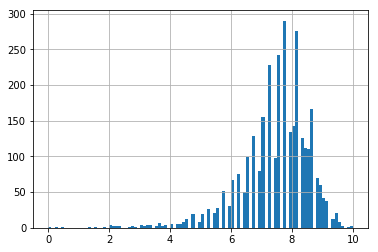

In [18]:
xdata.foodenv.hist(bins=100)

In [19]:
xdata.foodenv.kurtosis()

4.109489923595004

In [20]:
xdata.foodenv.skew()

-1.5105775026510035

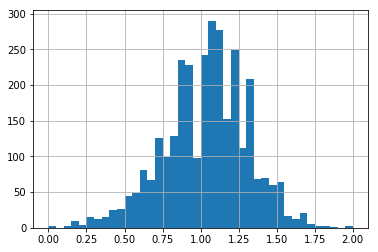

In [21]:
foodenv_tr = np.divide(xdata.foodenv,(15 - xdata.foodenv))
foodenv_tr_df = pd.DataFrame(foodenv_tr)
foodenv_tr_df.foodenv.hist(bins=40)

In [22]:
foodenv_tr.head()

fips
1001.0    0.923077
1003.0    1.142857
1005.0    0.595745
1007.0    1.027027
1009.0    1.307692
Name: foodenv, dtype: float64

In [23]:
foodenv_tr_df.foodenv.kurtosis()

0.37280081011135247

In [24]:
foodenv_tr_df.foodenv.skew()

-0.3112997331211166

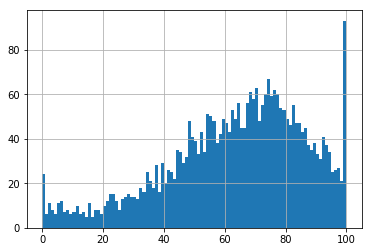

In [25]:
data.exercise.hist(bins=100)

In [26]:
exrank = xdata.exercise.rank(method='average',ascending=False, pct=True)

In [27]:
exrank.head()

fips
1001.0    0.452245
1003.0    0.398918
1005.0    0.686724
1007.0    0.953200
1009.0    0.931232
Name: exercise, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024340E7B6D8>]],
      dtype=object)

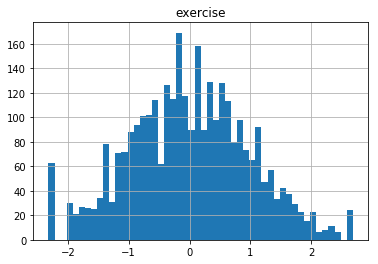

In [28]:
gexrank = exrank.map(lambda x : st.norm.ppf(x),na_action='ignore')
gexrank_df = pd.DataFrame(gexrank)
gexrank_df.hist(bins=50)

In [29]:
gexrank.head()

fips
1001.0   -0.119993
1003.0   -0.256150
1005.0    0.486586
1007.0    1.676702
1009.0    1.485030
Name: exercise, dtype: float64

In [30]:
gexrank_df.exercise.kurtosis()

-0.1913189400148383

In [31]:
gexrank_df.exercise.skew()

0.03119005262206821

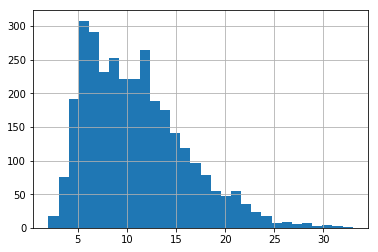

In [32]:
data.noinsurance.hist(bins=30)

In [33]:
data.noinsurance.kurtosis()

0.645147111594488

In [34]:
data.noinsurance.skew()

0.8721837672969731

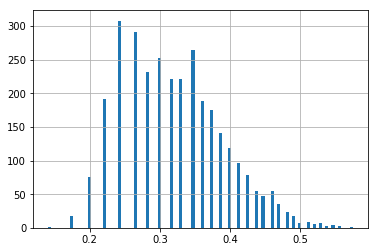

In [35]:
noinsurance_tr = np.sqrt(xdata.noinsurance / 100)
noinsurance_tr_df = pd.DataFrame(noinsurance_tr)
noinsurance_tr_df.noinsurance.hist(bins=100)

In [36]:
noinsurance_tr_df.noinsurance.kurtosis()

-0.33179586694743657

In [37]:
noinsurance_tr_df.noinsurance.skew()

0.3667274675946348

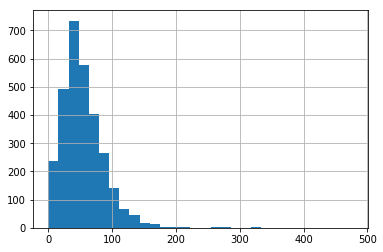

In [38]:
data.physicians.hist(bins=30)

In [39]:
data.physicians.kurtosis()

16.74574258848014

In [40]:
data.physicians.skew()

2.4184225043647416

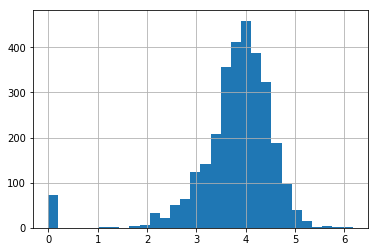

In [41]:
physicians_tr = np.log(xdata.physicians + 1)
physicians_tr_df = pd.DataFrame(physicians_tr)
physicians_tr_df.physicians.hist(bins=30)

In [42]:
physicians_tr_df.physicians.loc[physicians_tr_df['physicians'] > 0].kurtosis()

0.7073611783877793

In [43]:
physicians_tr_df.physicians.loc[physicians_tr_df['physicians'] > 0].skew()

-0.513578545951703

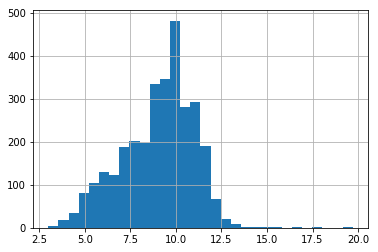

In [44]:
data.pollution.hist(bins=30)

In [45]:
data.pollution.kurtosis()

0.12756953354874812

In [46]:
data.pollution.skew()

-0.3800832326194176

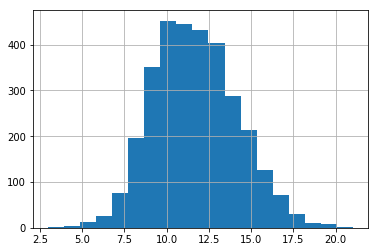

In [47]:
data.diabetes.hist(bins=19)

In [48]:
data.diabetes.kurtosis()

-0.05469148060926665

In [49]:
data.diabetes.skew()

0.24755912959895776

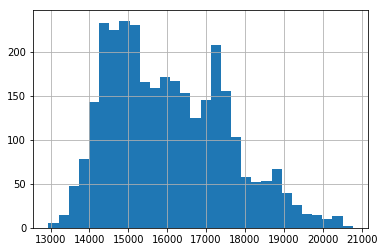

In [50]:
data.sunlight.hist(bins=30)

In [51]:
data.sunlight.kurtosis()

-0.40994072944805326

In [52]:
data.sunlight.skew()

0.5066839759743657

In [53]:
xdata['smoking_tr'] = smoking_tr

In [54]:
xdata['foodenv_tr'] = foodenv_tr

In [55]:
xdata['gauss_exercise'] = gexrank

In [56]:
xdata['noinsurance_tr'] = noinsurance_tr

In [57]:
xdata['physicians_tr'] = physicians_tr

In [58]:
len(xdata)

3189

In [59]:
xdata.head()

,smoking,obesity,foodenv,exercise,noinsurance,physicians,pollution,diabetes,sunlight,smoking_tr,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr
fips,,,,,,,,,,,,,,
1001.0,19.0,38.0,7.2,69.0,9.0,42.0,11.7,14.0,17103.72,0.845897,0.923077,-0.119993,0.300000,3.761200
1003.0,17.0,31.0,8.0,72.0,11.0,73.0,10.3,11.0,17660.59,0.000000,1.142857,-0.256150,0.331662,4.304065
1005.0,22.0,44.0,5.6,54.0,13.0,39.0,11.5,18.0,17315.13,1.681793,0.595745,0.486586,0.360555,3.688879
1007.0,20.0,38.0,7.6,16.0,10.0,57.0,11.2,15.0,16904.87,1.146531,1.027027,1.676702,0.316228,4.060443
1009.0,20.0,34.0,8.5,23.0,12.0,23.0,11.7,14.0,16393.63,1.146531,1.307692,1.485030,0.346410,3.178054


In [60]:
xdatanorm = xdata.drop(columns=['smoking','foodenv','exercise','noinsurance','physicians'])
xdatanorm.head()

,obesity,pollution,diabetes,sunlight,smoking_tr,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr
fips,,,,,,,,,
1001.0,38.0,11.7,14.0,17103.72,0.845897,0.923077,-0.119993,0.300000,3.761200
1003.0,31.0,10.3,11.0,17660.59,0.000000,1.142857,-0.256150,0.331662,4.304065
1005.0,44.0,11.5,18.0,17315.13,1.681793,0.595745,0.486586,0.360555,3.688879
1007.0,38.0,11.2,15.0,16904.87,1.146531,1.027027,1.676702,0.316228,4.060443
1009.0,34.0,11.7,14.0,16393.63,1.146531,1.307692,1.485030,0.346410,3.178054


In [61]:
xdatanorm.count()

obesity           3147
pollution         3113
diabetes          3147
sunlight          3112
smoking_tr        3147
foodenv_tr        3128
gauss_exercise    3141
noinsurance_tr    3146
physicians_tr     3011
dtype: int64

In [62]:
ydata = data[['fips','Age Adjusted Rate']].set_index('fips')

In [63]:
ydata.head()

,Age Adjusted Rate
fips,
1001.0,275.9
1003.0,240.2
1005.0,306.8
1007.0,321.3
1009.0,287.3


In [64]:
ydata.count()

Age Adjusted Rate    3056
dtype: int64

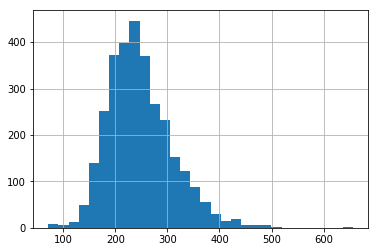

In [65]:
ydata['Age Adjusted Rate'].hist(bins=30)

In [66]:
ydata['Age Adjusted Rate'].kurtosis()

1.3515820184154794

In [67]:
ydata['Age Adjusted Rate'].skew()

0.7742437322068572

In [68]:
# Turn the DataFrames into numpy arrays to have scikit work on them...
X = xdatanorm.values
Y = ydata.values

In [69]:
# Because we have missing values, we will use the Imputer to fix them... 
from sklearn.impute import SimpleImputer
# Establish imputer properties 
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
# Compute the values to fill in
imputer = imputer.fit(X)
# Place the values in the array
X = imputer.transform(X)

In [70]:
# Impute the mean value to Y as well
# set the mean
ymean = np.nanmean(Y)
# create an array for where to put this value
inds = np.where(np.isnan(Y))
# Then put the mean there
Y[inds] = np.take(ymean, inds[1])

In [71]:
#Now we can do regression on these values ...
from sklearn.linear_model import ElasticNetCV
# Make regression object
regr = ElasticNetCV(l1_ratio=[0.1,0.3,0.5,0.7,0.8,0.9,0.95,0.99], cv=5, random_state=0, normalize=True,)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
clf = RandomForestRegressor(random_state=42)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.3, random_state=42)

In [76]:
clf.fit(Xtrain,ytrain)

C:\Users\andre\Anaconda3\envs\plotenv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\andre\Anaconda3\envs\plotenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [77]:
clf.score(Xtest,ytest)

0.39958060221242403

In [78]:
for a,b in zip(xdatanorm.columns, clf.feature_importances_):
    print (a, b)

obesity 0.07749546382605114
pollution 0.09726489571380607
diabetes 0.08004792028241112
sunlight 0.10265262980150895
smoking_tr 0.31970487475532017
foodenv_tr 0.08284918833569051
gauss_exercise 0.08661685176654323
noinsurance_tr 0.062455418371061534
physicians_tr 0.09091275714760726


In [79]:
clf.fit(X,Y)

C:\Users\andre\Anaconda3\envs\plotenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
# Now do the fit
regr.fit(X,Y)

C:\Users\andre\Anaconda3\envs\plotenv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 0.99], max_iter=1000,
       n_alphas=100, n_jobs=None, normalize=True, positive=False,
       precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
       verbose=0)

In [81]:
regr.alpha_

0.0006627493433010329

In [82]:
regr.l1_ratio_

0.9

In [83]:
regr.coef_

array([ 1.70773554e+00,  3.77799247e+00,  3.19736107e+00,  2.54524375e-03,
        1.13439313e+01, -2.37915170e+01,  3.86918402e+00,  4.47906298e+01,
       -3.63677095e+00])

In [84]:
regr.n_iter_

12

In [85]:
regr.intercept_

101.28759604273168

In [86]:
regr.mse_path_

array([[[3970.02641283, 3299.32911009, 4459.67495433, 3303.9337717 ,
         3360.15496306],
        [3970.00365126, 3299.3024151 , 4459.65108397, 3303.91208195,
         3360.12955131],
        [3969.97307309, 3299.2621712 , 4459.61852138, 3303.8850438 ,
         3360.10230425],
        ...,
        [3516.14104841, 2794.84514529, 3898.11011422, 2909.88258799,
         2987.972546  ],
        [3491.51938457, 2768.07978854, 3866.82742864, 2888.58725684,
         2968.26921176],
        [3466.05396061, 2740.48223264, 3834.36758441, 2866.57093421,
         2947.95182131]],

       [[3969.95552492, 3299.25854137, 4459.65534389, 3303.8698551 ,
         3360.05711664],
        [3969.86776823, 3299.15564686, 4459.56331006, 3303.78625286,
         3359.95915979],
        [3969.74992336, 3299.00052063, 4459.43779585, 3303.68203225,
         3359.85414057],
        ...,
        [2946.05185198, 2205.74907864, 3140.52296638, 2418.93140829,
         2551.06779567],
        [2916.24341839, 2177.716

In [87]:
regr.score(X,Y)

0.4176346066851323

In [88]:
Yp = regr.predict(X)

In [89]:
len(Yp)

3189

In [90]:
k = np.array((1,0,0,0,0,0,0,0,0),).reshape(1,-1)

In [91]:
regr.predict(k)

array([102.99533159])

In [92]:
xdatanorm.head()

,obesity,pollution,diabetes,sunlight,smoking_tr,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr
fips,,,,,,,,,
1001.0,38.0,11.7,14.0,17103.72,0.845897,0.923077,-0.119993,0.300000,3.761200
1003.0,31.0,10.3,11.0,17660.59,0.000000,1.142857,-0.256150,0.331662,4.304065
1005.0,44.0,11.5,18.0,17315.13,1.681793,0.595745,0.486586,0.360555,3.688879
1007.0,38.0,11.2,15.0,16904.87,1.146531,1.027027,1.676702,0.316228,4.060443
1009.0,34.0,11.7,14.0,16393.63,1.146531,1.307692,1.485030,0.346410,3.178054


In [94]:
masterdata = data.merge(xdatanorm,on='fips',how='outer')

In [95]:
masterdata.head()

,Unnamed: 0,county,state,county_and_state_x,code,Deaths,Population,Crude Rate,fips,smoking,...,Age Adjusted Rate,obesity_y,pollution_y,diabetes_y,sunlight_y,smoking_tr,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr
0,0,Autauga,Alabama,"Autauga County, AL",1001.0,163.0,55416.0,294.1,1001.0,19.0,...,275.9,38.0,11.7,14.0,17103.72,0.845897,0.923077,-0.119993,0.300000,3.761200
1,1,Baldwin,Alabama,"Baldwin County, AL",1003.0,640.0,208563.0,306.9,1003.0,17.0,...,240.2,31.0,10.3,11.0,17660.59,0.000000,1.142857,-0.256150,0.331662,4.304065
2,2,Barbour,Alabama,"Barbour County, AL",1005.0,90.0,25965.0,346.6,1005.0,22.0,...,306.8,44.0,11.5,18.0,17315.13,1.681793,0.595745,0.486586,0.360555,3.688879
3,3,Bibb,Alabama,"Bibb County, AL",1007.0,79.0,22643.0,348.9,1007.0,20.0,...,321.3,38.0,11.2,15.0,16904.87,1.146531,1.027027,1.676702,0.316228,4.060443
4,4,Blount,Alabama,"Blount County, AL",1009.0,199.0,57704.0,344.9,1009.0,20.0,...,287.3,34.0,11.7,14.0,16393.63,1.146531,1.307692,1.485030,0.346410,3.178054


In [96]:
masterdata.columns

Index(['Unnamed: 0', 'county', 'state', 'county_and_state_x', 'code', 'Deaths',
       'Population', 'Crude Rate', 'fips', 'smoking', 'obesity_x', 'foodenv',
       'exercise', 'noinsurance', 'physicians', 'pollution_x', 'diabetes_x',
       'county_and_state_y', 'code2', 'sunlight_x', 'blow', 'ganj', 'smack',
       'Age Adjusted Rate', 'obesity_y', 'pollution_y', 'diabetes_y',
       'sunlight_y', 'smoking_tr', 'foodenv_tr', 'gauss_exercise',
       'noinsurance_tr', 'physicians_tr'],
      dtype='object')

In [99]:
masterdata = masterdata.drop(columns = ['obesity_y','pollution_y','diabetes_y','sunlight_y'])
masterdata = masterdata.rename(columns = {'obesity_x':'obesity','pollution_x':'pollution',
                                         'diabetes_x':'diabetes','sunlight_x':'sunlight'})

In [100]:
masterdata.columns

Index(['Unnamed: 0', 'county', 'state', 'county_and_state_x', 'code', 'Deaths',
       'Population', 'Crude Rate', 'fips', 'smoking', 'obesity', 'foodenv',
       'exercise', 'noinsurance', 'physicians', 'pollution', 'diabetes',
       'county_and_state_y', 'code2', 'sunlight', 'blow', 'ganj', 'smack',
       'Age Adjusted Rate', 'smoking_tr', 'foodenv_tr', 'gauss_exercise',
       'noinsurance_tr', 'physicians_tr'],
      dtype='object')

In [101]:
masterdata.to_csv('master_county_datafile.csv')